# 유방암 분류

- 유방암은 전 세계 여성들 사이에서 가장 흔한 암이다.
- 2018년 기준 총 암 발병률 11%이며 약 200만명이 유방암에 걸렸다.
- 연구 결과에 따르면 의사들이 79%의 정확도로 암을 진단한 반면, 머신 러닝 기술로는 91% 정확도로 진단하였다.

- 반경, 질감, 둘레, 면적, 평탄함 등을 이용한 30개 열이 있다.
- 212개의 양성, 357개의 음성 데이터가 있다.
- 이번 목표는 유방암 데이터 분류하는 법을 학습시켜 양성, 음성을 구분할 수 있도록 한다.
- 출처: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

# 목차

1. 데이터 읽기
2. 데이터 시각화
    - 상관관계 표현
3. 모델 학습
4. 모델 평가
    - SVM 이용
5. 모델 개선: SVM의 C와 감마 파라미터 최적화
6. 결론

# 데이터 읽기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 사이킷 라이브러리에도 유방암 데이터를 가져올 수 있다.
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()

In [3]:
#데이터 세트 열 추출
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer['data'].shape

(569, 30)

In [5]:
# 이진수인 target 열을 추가한다. 1이 음성 0이 양성.
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns = np.append(cancer['feature_names'], ['target']))

In [6]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


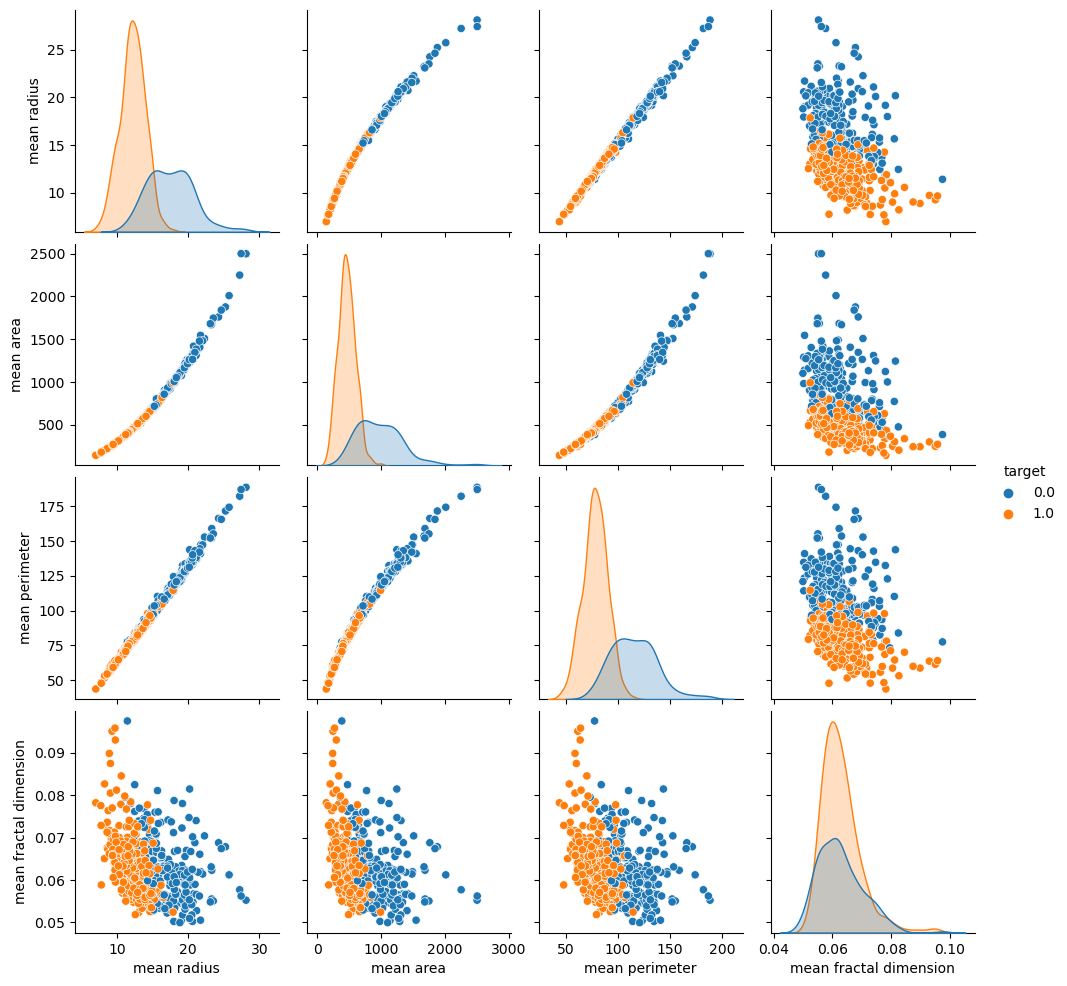

In [7]:
# 데이터를 도식화 (평균 반경, 평균 면적, 평균 둘레, 평균 프랙탈 차원)
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean area', 'mean perimeter', 'mean fractal dimension'])

1~3열은 양성일 때가 음성 일때보다 높은 값을 볼 수 있다.

프랙탈 차원은 앞의 3개 열과 반대의 값을 보여 준다. 

<AxesSubplot:>

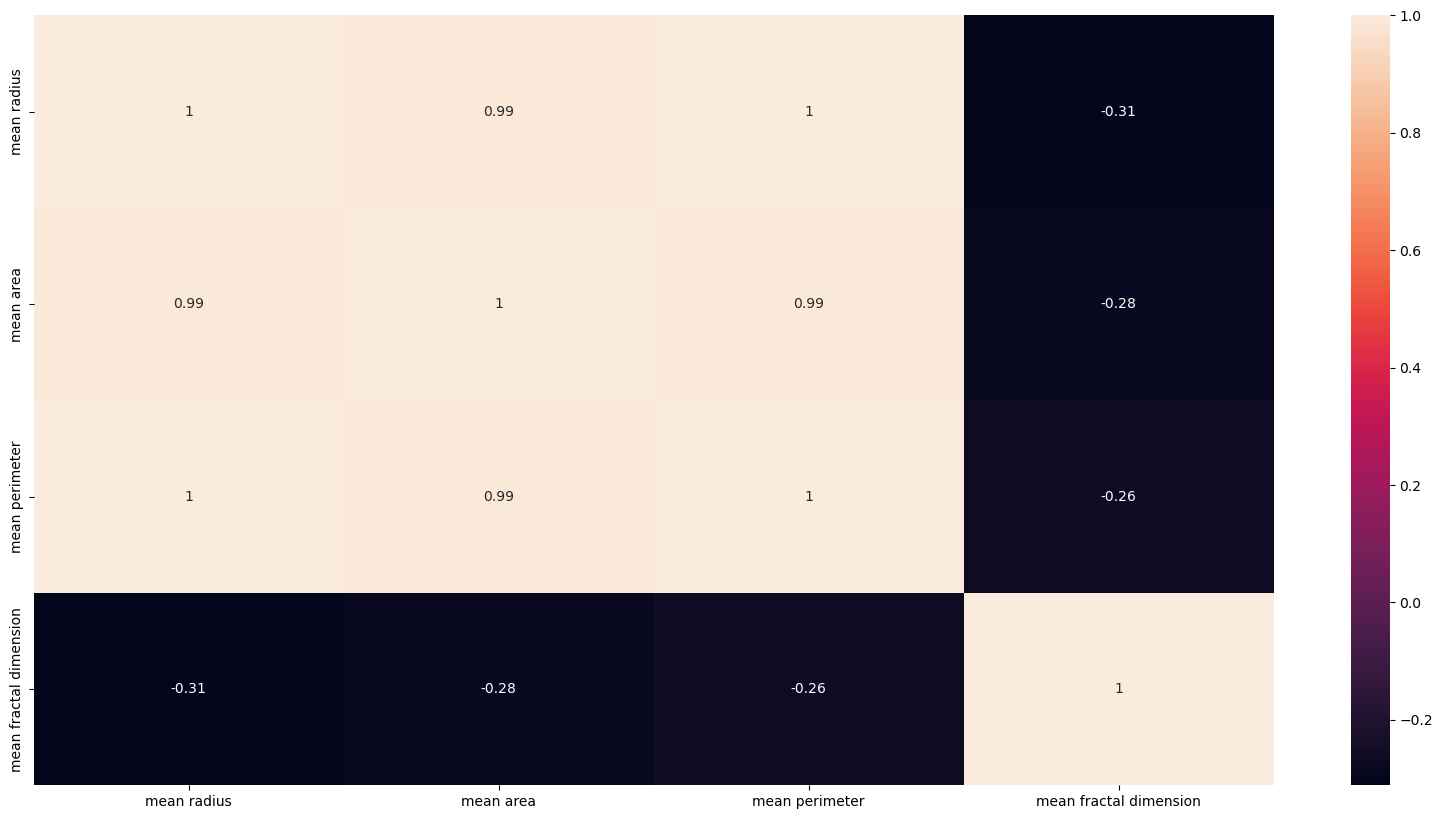

In [8]:
# 상관관계도 나타내보자.
df2 = df[['mean radius', 'mean area', 'mean perimeter', 'mean fractal dimension']]
plt.figure(figsize=(20,10)) 
sns.heatmap(df2.corr(), annot=True)

앞의 3개 열과 반대 값을 보여준 프랙탈 차원을 제외하고 유의한 상관관계를 볼 수 있다.

# 모델 학습

In [9]:
# target을 반응 변수로 만들기
X = df.drop(['target'],axis=1)
y = df['target']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

In [11]:
# 소프트벡터머신을 이용한 모델 학습
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

# 모델 평가

In [12]:
# 정규화 작업
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [13]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)

SVC()

<AxesSubplot:>

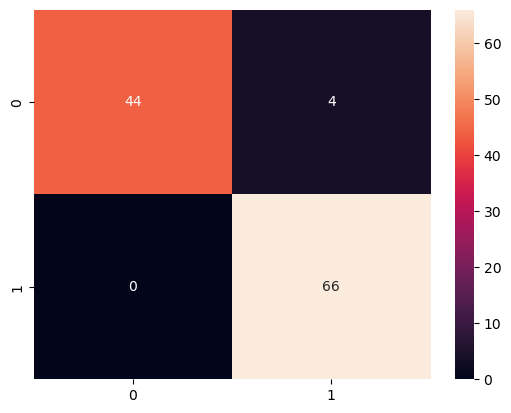

In [14]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm,annot=True,fmt="d")

In [15]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



0.97 정확도를 보여주고 있다.

# 모델 개선: SVM의 C와 감마 파라미터 최적화

In [16]:
# 최적 파라미터를 찾아보자.
from sklearn.model_selection import GridSearchCV

In [17]:
# 범위를 지정
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.912 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.648 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [19]:
#최적의 값 찾기
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

c, gamma 최적의 값이 1인것을 확인할 수 있었다.

<AxesSubplot:>

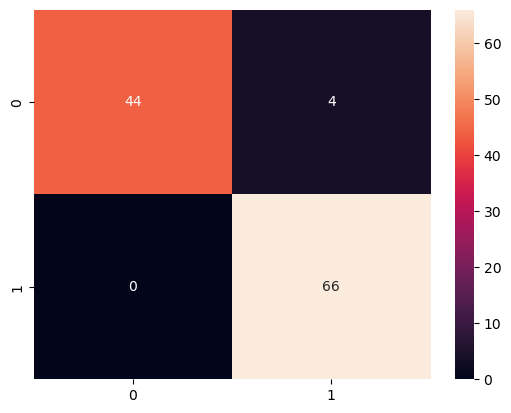

In [20]:
grid_pred = grid.predict(X_test_scaled)
cm = confusion_matrix(y_test, grid_pred)
sns.heatmap(cm, annot=True)

In [21]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96        48
         1.0       0.94      1.00      0.97        66

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# 결론

0.97의 정확도를 보여주고 있기 때문에 매우 높은 확률로 옳은 진단을 할 수 있다.


1종 오류는 0, 2종 오류는 4건 일어났지만, 더 정확도를 높일 수 있는 방안을 찾아보고자 한다.